# Final Project PHY-234

### Matilda Carne and Diogo Tandeta Tartarotti
In this notebook, we numerically analyze solutions for the Duffing equation, $\ddot{x} + \beta\dot{x} + \delta x + \alpha x^3 = \gamma\cos\omega t$. 

We observe period-doubling, chaotic motion, and a return to non-chaotic oscillation by ranging $\gamma$ from 0.2 to 0.65.

In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential equation integrator
from scipy.interpolate import UnivariateSpline

Populating the interactive namespace from numpy and matplotlib


### Constants and Initial Conditions
First, we start defining the constants and initial conditions for our systems. Note we are only varying, $\gamma$, $\alpha$, and later the initial conditions.

In [2]:
#defining variables, constants, and initial conditions
m = 1 # mass of spring
delta = -1 #delta 
beta = 0.3#damping coefficient
alpha = 1 #nonlinear stiffness coefficient(THE NEW ONE!)
gamma_values = [0.2,0.28, 0.29, 0.37, 0.5, 0.65,] #driving force strength
omega = 1.2#angular velocity
x0 = 0 
xd0 = 1

### Deriv function and equation Solver

Now, we define our deriv function and a function to solve the Duffing equation from an input of constants and initial conditions using odeint and the previously defined deriv function.


In [3]:
#deriv and solver functions
def deriv (f, t, param):
    alpha = param[0]
    beta = param[1]
    gamma = param[2]
    delta = param[3]
    omega = param[4]
    
    x = f[0]
    xD = f[1]
    dxdt = xD
    dvdt = gamma*cos(omega*t)-beta*dxdt-delta*x-alpha*x**3
    return array([dxdt,dvdt],float) 

def SolveDuffing (x0, xD0, alpha, beta, gamma, delta, omega, tmax):
    t= linspace(0, tmax, 2000*tmax)
    f_init = array([x0, xD0])
    param = array([alpha, beta, gamma,delta,omega])
    f_sol = odeint(deriv, f_init, t, args=(param,))
    return array([t,f_sol[:,0],f_sol[:,1]])



### Time Series

Now, we plot the time series for our different values of $\gamma$. Note we are only graphing the time series from $t = 60$ to $t = 100$. This is to help visualize the steady state motion.

It is noticeable that for $\gamma = 0.2$, the steady state motion has period $T$. Then, for $\gamma = 0.28$, we find by inspection that the period has doubled and is $2T$ now. For $\gamma = 0.29$ it is harder to see from the time series, but the period has double again and is now $4T$.

Then, when $\gamma = 0.37$ we find by inspection that the steady state is now a 5-period motion.  for $\gamma = 0.5$, we arrive at chaos. At a first glance, the motion of the steady state of $\gamma = 0.5$ might look periodical, but upon a deeper inspection it is possible to notice that every oscillation maintain a similar shape but have different height.

Finally, for $\gamma = 0.65$, we return to period-2 motion.

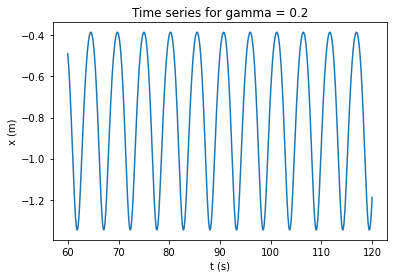

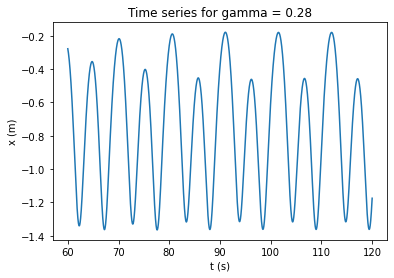

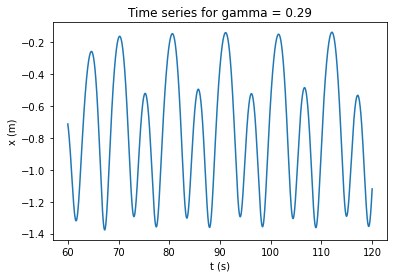

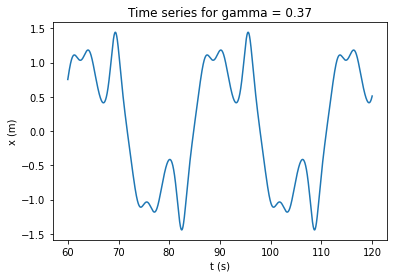

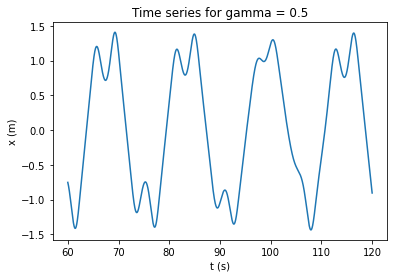

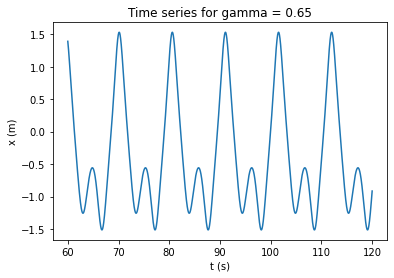

In [4]:
#time series of the steady state for the different values of gamma

maxTime = 120
cut_index = 120000 #so that we can graph a part of the steady state

for i in gamma_values:
    fSol = SolveDuffing(x0, xd0, alpha, beta, i,delta, omega, maxTime)
    figure()
    plot(fSol[0][cut_index:],fSol[1][cut_index:])
    title("Time series for gamma = " + str(i))
    xlabel("t (s)")
    ylabel("x (m)")

### Phase Space for different gammas

To visualize better the period-doubling and compare to the linear restorative force case ($\alpha = 0$), we will graph the phase space for each value of gamma for both $\alpha = 1$ and $\alpha =0$.

As expected, the phase space for all systems with $\alpha = 0$ look like an ellipse and do not demonstrate period-doubling nor chaos.

Furthermore, it is easier to notice what we have pointed out for each sytem with $\alpha = 1$, like the period-doubling from $\gamma = 0.2$ to $\gamma =0.28$ and the chaos of the motion for $\gamma = 0.5$.

We can also notice the presence of two attractors in the phase space for $\gamma = 0.5$.

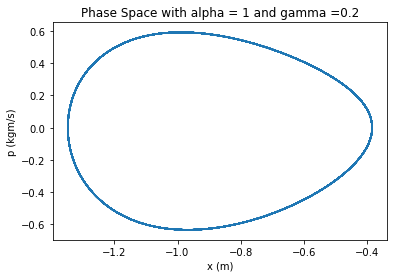

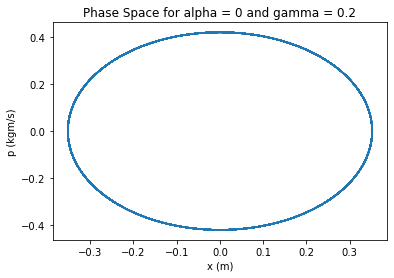

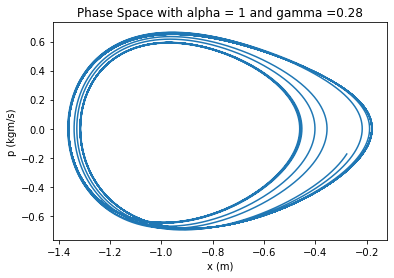

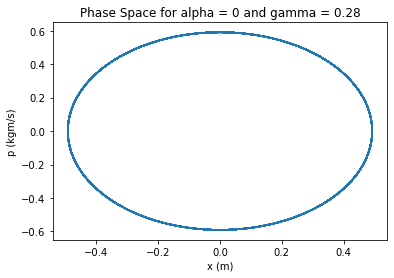

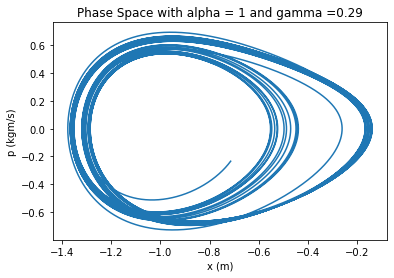

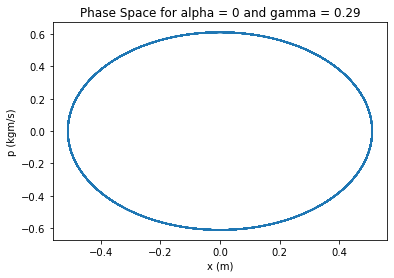

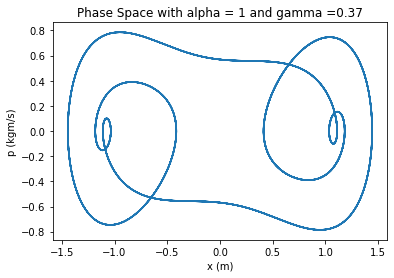

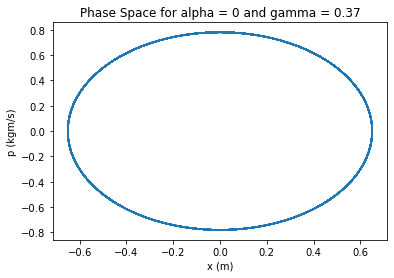

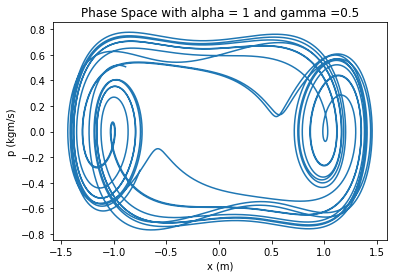

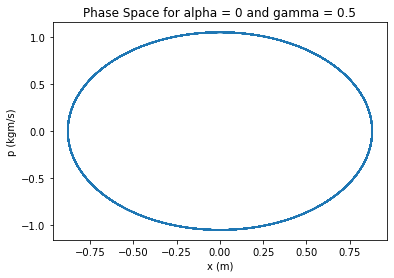

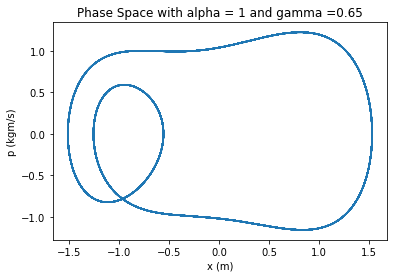

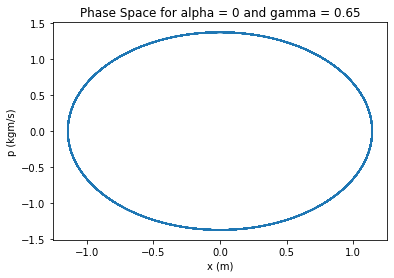

In [5]:
#graph phase space duffing & non-duffing
#for loop for different values of gamma

maxTime = 200
def momentum (dxdt, mass):
    return dxdt*mass

for i in gamma_values:
    fsol1 = SolveDuffing(x0,xd0,alpha,beta, i, delta,omega,maxTime)
    p1 = momentum(fsol1[2][cut_index:],m) 
    x1 = fsol1[1][cut_index:]
    figure() 
    plot(x1, p1)
    title("Phase Space with alpha = " + str(alpha) + " and gamma =" + str(i))
    xlabel("x (m)")
    ylabel("p (kgm/s)")
    
    fsol2 = SolveDuffing(x0,xd0,0,beta, i, 1,omega,maxTime) #no alpha term!, delta must be positive
    
    p2 = momentum(fsol2[2][cut_index:],m)
    x2 = fsol2[1][cut_index:]
    figure() 
    plot(x2, p2)
    title("Phase Space for alpha = 0 and gamma = " + str(i))
    xlabel("x (m)")
    ylabel("p (kgm/s)")

### Poincaré sections 

Even though the Phase Space diagrams are really helpful visualization tools, Poincaré sections are an even greater tool when it comes to visualizing period of motion and patterns in chaotic motion. So, we will now graph the Poincaré sections for each value of $\gamma$.

From the Poincaré section, the tendencies we have outlined in the time series part become clear. For $\gamma = 0.2$, the Poincaré section is a single point in Phase Space: this means the period of motion is 1, since after each period, the system finds itself in the same point in phase space. 

For $\gamma = 0.28$, the Poincaré section has two points in Phase Space, indicating that the period of motion has doubled.

For $\gamma = 0.29$, the Poincaré section has four points in Phase Space, indicating that the period of motion doubled again.

Then, for $\gamma = 0.37$, the Poincaré section has five points, which demonstrates that the motion has period of 5.

For $\gamma = 0.5$, things get more interesting: there are a bunch of points in the Poincaré section, and they seem to form a pattern. 

Finally, for $\gamma = 0.65$, the Poincaré section has only two points, signalling the return of the period-2 motion

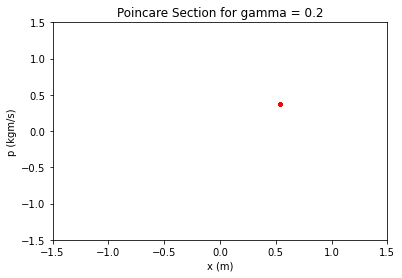

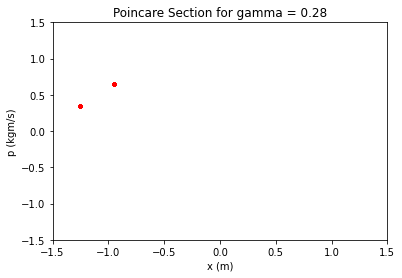

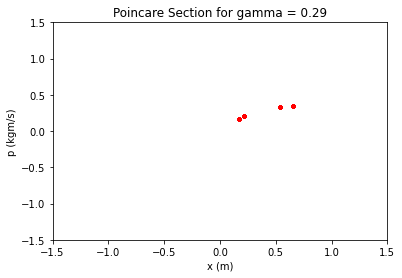

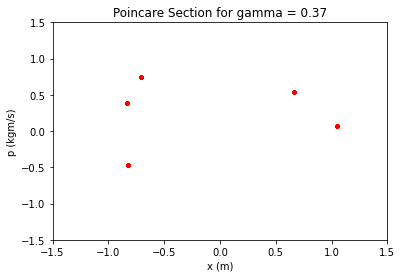

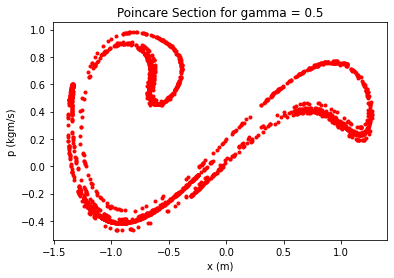

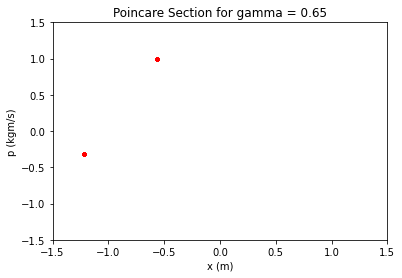

In [6]:
#graph poincare for the different gamma values

deltaT = 2*pi/omega
maxTime = 15000
indices = arange(1000, maxTime, deltaT)

for i in gamma_values:
    fsolPoincare = SolveDuffing(0,0,alpha,beta,i, delta, omega, maxTime)
    time_array = fsolPoincare[0]
    pP = momentum(fsolPoincare[2],m) 
    xP = fsolPoincare[1]

    xFit = UnivariateSpline(time_array, xP, k = 5, s =0)
    pFit = UnivariateSpline(time_array, pP, k = 5, s =0)

    xPlot = xFit(indices)
    pPlot = pFit(indices)
    figure()
    plot(xPlot, pPlot, ".r")
    title("Poincare Section for gamma = " + str(i))
    xlabel("x (m)")
    ylabel("p (kgm/s)")
    if(i != 0.5):
        xlim(-1.5,1.5)
        ylim(-1.5,1.5)


### Chaos Comeback and Attractor Movement

Chaos once again takes place when $\gamma = 0.68$, remaining there until $\gamma = 0.725$. Notice, however, that this time the attractor spans a bigger area in Phase Space than the attractor of $\gamma = 0.5$. Furthermore, the left "arm" of the attractor divides itself into two different "arms" for $0.68 \leq \gamma \leq 0.725$.

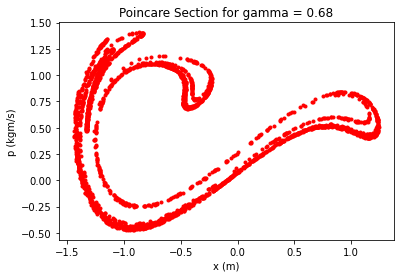

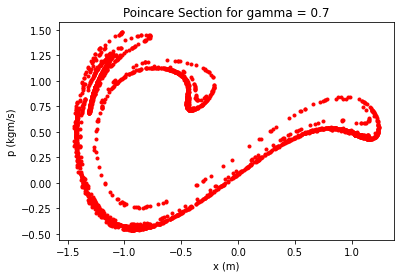

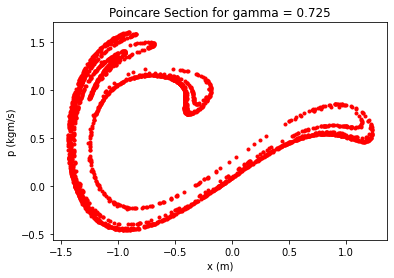

In [7]:
#Chaos Comeback

gamma_chaos = [0.68,0.7,0.725]

for i in gamma_chaos:
    deltaT = 2*pi/omega
    maxTime = 15000
    indices = arange(1000, maxTime, deltaT)

    fsolPoincare = SolveDuffing(0,0,alpha,beta,i, delta, omega, maxTime)
    time_array = fsolPoincare[0]
    pP = momentum(fsolPoincare[2],m) 
    xP = fsolPoincare[1]

    xFit = UnivariateSpline(time_array, xP, k = 5, s =0)
    pFit = UnivariateSpline(time_array, pP, k = 5, s =0)

    xPlot = xFit(indices)
    pPlot = pFit(indices)
    figure()
    plot(xPlot, pPlot, ".r")
    title("Poincare Section for gamma = " + str(i))
    xlabel("x (m)")
    ylabel("p (kgm/s)")